# Transit Data Time Series Analysis

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data wrangling
#### 4. Time series analysis
#### 5. Testing for stationarity
#### 6. Stationarizing transit data
#### 7. Time series forecasting

## 1. Importing libraies and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Define path

path = '/Users/matthewmacbook/Documents/CareerFoundry/Data Immersion/Achievement 6 - Advanced Analytics and Dashboard Design/COVID-19 Public Transit Project'


In [4]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [5]:
# Import monthly datasets

df_monthly_trips = pd.read_csv(os.path.join(path, 'Datasets', 'Raw Data', 'Monthly UPT Aug 2023.csv'))
df_monthly_vehicle_miles = pd.read_csv(os.path.join(path, 'Datasets', 'Raw Data', 'Monthly VRM Aug 2023.csv'))

In [6]:
df_monthly_trips.head()

,NTD ID,Agency,UACE CD,UZA Name,Mode,TOS,3 Mode,1/2002,2/2002,3/2002,4/2002,5/2002,6/2002,7/2002,8/2002,9/2002,10/2002,11/2002,12/2002,1/2003,2/2003,3/2003,4/2003,5/2003,6/2003,7/2003,8/2003,9/2003,10/2003,11/2003,12/2003,1/2004,2/2004,3/2004,4/2004,5/2004,6/2004,7/2004,8/2004,9/2004,10/2004,11/2004,12/2004,1/2005,2/2005,3/2005,4/2005,5/2005,6/2005,7/2005,...,7/2019,8/2019,9/2019,10/2019,11/2019,12/2019,1/2020,2/2020,3/2020,4/2020,5/2020,6/2020,7/2020,8/2020,9/2020,10/2020,11/2020,12/2020,1/2021,2/2021,3/2021,4/2021,5/2021,6/2021,7/2021,8/2021,9/2021,10/2021,11/2021,12/2021,1/2022,2/2022,3/2022,4/2022,5/2022,6/2022,7/2022,8/2022,9/2022,10/2022,11/2022,12/2022,1/2023,2/2023,3/2023,4/2023,5/2023,6/2023,7/2023,8/2023
0,1.0,King County Department of Metro Transit,80389.0,"Seattle--Tacoma, WA",DR,PT,Bus,135144,127378,136030,142204,144697,131833,137547,136915,132111,150074,127835,114857,137888,126339,140920,144048,142725,135650,143660,136752,136291,152853,127150,131877,132563,136857,156728,151997,147491,150217,146303,145459,142994,147128,121962,127022,143393,139615,157100,152143,164149,159630,156130,...,78161,78350,73259,82385,72116,70734,73573,71893,40217,19769,22043,25108,36591,33059,34071,36070,31020,31977,31199,28890,35712,35814,36331,41474,43135,43801,43153,44676,43901,40018,40600,42738,48918,47823,47934,48485,46783,50105,47887,49032,45283,36627,47779,44231,52048,49625,55264,42949,52370,56040
1,1.0,King County Department of Metro Transit,80389.0,"Seattle--Tacoma, WA",DR,TN,Bus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20716,24400,27011,24361,25736,28317
2,1.0,King County Department of Metro Transit,80389.0,"Seattle--Tacoma, WA",DR,TX,Bus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13790,12821,15375,19564,15714,14859,16639,17230,4462,1938,3630,6881,6416,5880,6650,6139,5929,4666,4177,4991,7078,8081,8177,4768,6679,7723,8765,10827,9716,7962,6469,7298,10931,9229,9084,8798,8817,9688,9582,11356,11383,8159,10034,9939,11402,10438,10611,9856,9619,10723
3,1.0,King County Department of Metro Transit,80389.0,"Seattle--Tacoma, WA",FB,DO,Ferry,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,90079,67308,62058,56795,34259,32270,37519,35751,14068,2039,2221,4797,9643,10630,9801,8788,5586,6087,5355,5253,8573,12037,26121,34292,52129,44759,33479,27505,20047,17293,15050,18317,26609,29292,33559,45085,61251,60786,46970,30880,18357,14251,19288,17590,26039,25581,39368,41956,63863,52949
4,1.0,King County Department of Metro Transit,80389.0,"Seattle--Tacoma, WA",LR,DO,Rail,12990,17240,21498,22687,31981,44346,64552,61922,32321,20384,13964,14050,16350,17793,21133,24064,32910,47554,70188,73932,40997,23825,18405,16439,16333,20096,23230,27988,33379,44854,62999,66065,41974,24849,19196,17146,16304,19660,23613,26523,33507,45838,64571,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Data cleaning

In [7]:
# List of columns to exclude
exclude_columns = ['NTD ID', 'Agency', 'UZA Name', 'Mode', 'TOS', '3 Mode']

# Apply to_numeric to all columns except the excluded ones
df_monthly_trips = df_monthly_trips.apply(lambda col: pd.to_numeric(col, errors='coerce', downcast = 'integer') if col.name not in exclude_columns else col)


In [8]:
df_monthly_trips.shape

(2278, 267)

In [9]:
df_monthly_trips.isnull().sum()

NTD ID      12
Agency      12
UACE CD     18
UZA Name    18
Mode        12
            ..
4/2023      12
5/2023      12
6/2023      12
7/2023      12
8/2023      12
Length: 267, dtype: int64

In [10]:
df_monthly_trips.dropna(inplace = True)

In [11]:
df_monthly_trips.isnull().sum()

NTD ID      0
Agency      0
UACE CD     0
UZA Name    0
Mode        0
           ..
4/2023      0
5/2023      0
6/2023      0
7/2023      0
8/2023      0
Length: 267, dtype: int64

In [12]:
df_monthly_trips.shape

(2260, 267)

## 3. Data wrangling

In [13]:
column_sum_map = {
    f'{i}/{j}': 'sum'
    for j in range(2002, 2023)
    for i in range(1, 13)
} 

# Add columns for 2023 (up to August)
column_sum_map.update({f'{i}/{2023}': 'sum' for i in range(1, 9)})


In [14]:
# Group by the desired columns and aggregate with sum
df_monthly_trips_all_sum = df_monthly_trips.agg(column_sum_map)

# Reset the index to convert the result into a DataFrame
df_monthly_trips_all_sum = df_monthly_trips_all_sum.reset_index()

# Display the resulting DataFrame
print(df_monthly_trips_all_sum)

      index            0
0    1/2002  748024496.0
1    2/2002  714295689.0
2    3/2002  772213848.0
3    4/2002  775290182.0
4    5/2002  785732569.0
..      ...          ...
255  4/2023  557543373.0
256  5/2023  610926509.0
257  6/2023  571132149.0
258  7/2023  541225981.0
259  8/2023  586933011.0

[260 rows x 2 columns]


In [15]:
df_monthly_trips_all_sum.rename(columns = {'index': 'Date', 0:'US Transit Trips'}, inplace = True)

In [16]:
# Convert the 'Date' column to datetime
df_monthly_trips_all_sum['Date'] = df_monthly_trips_all_sum['Date'].apply(lambda x: pd.to_datetime(x, format='%m/%Y'))

print(df_monthly_trips_all_sum)


          Date  US Transit Trips
0   2002-01-01       748024496.0
1   2002-02-01       714295689.0
2   2002-03-01       772213848.0
3   2002-04-01       775290182.0
4   2002-05-01       785732569.0
..         ...               ...
255 2023-04-01       557543373.0
256 2023-05-01       610926509.0
257 2023-06-01       571132149.0
258 2023-07-01       541225981.0
259 2023-08-01       586933011.0

[260 rows x 2 columns]


In [17]:
# Set the "Date" column as the index

from datetime import datetime

df_monthly_trips_all_sum['datetime'] = pd.to_datetime(df_monthly_trips_all_sum['Date']) # Create a datetime column from "Date.""
df_monthly_trips_all_sum = df_monthly_trips_all_sum.set_index('datetime') # Set the datetime as the index of the dataframe.
df_monthly_trips_all_sum.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_monthly_trips_all_sum.head()

,US Transit Trips
datetime,
2002-01-01,748024496.0
2002-02-01,714295689.0
2002-03-01,772213848.0
2002-04-01,775290182.0
2002-05-01,785732569.0


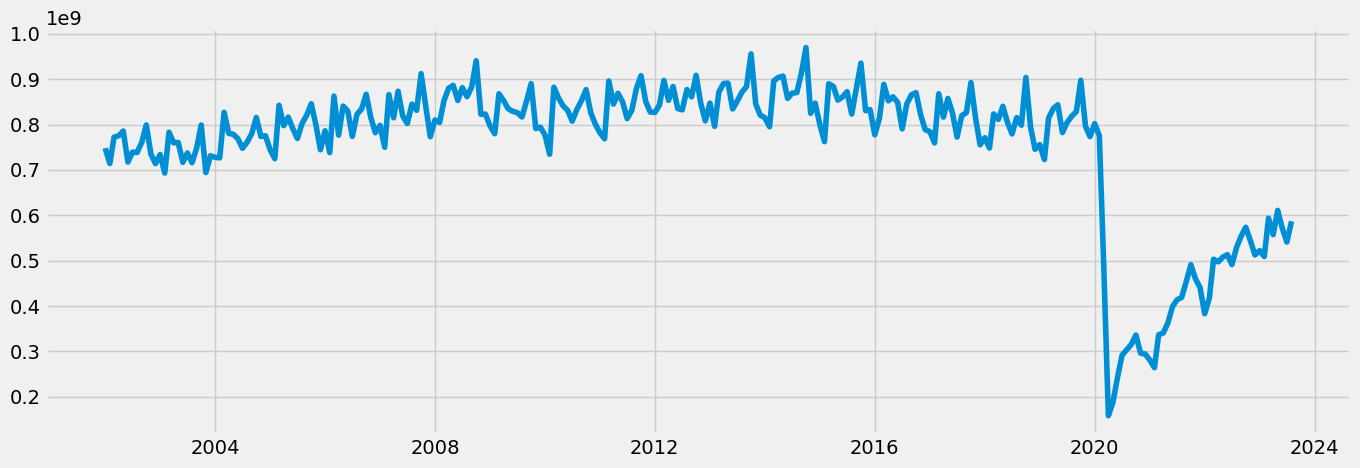

In [18]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_monthly_trips_all_sum)

In [19]:
df_monthly_trips_reset_index = df_monthly_trips_all_sum.reset_index()

In [20]:
df_monthly_trips_reset_index

,datetime,US Transit Trips
0,2002-01-01,748024496.0
1,2002-02-01,714295689.0
2,2002-03-01,772213848.0
3,2002-04-01,775290182.0
4,2002-05-01,785732569.0
...,...,...
255,2023-04-01,557543373.0
256,2023-05-01,610926509.0
257,2023-06-01,571132149.0
258,2023-07-01,541225981.0


In [21]:
df_monthly_trips_all_sum

,US Transit Trips
datetime,
2002-01-01,748024496.0
2002-02-01,714295689.0
2002-03-01,772213848.0
2002-04-01,775290182.0
2002-05-01,785732569.0
...,...
2023-04-01,557543373.0
2023-05-01,610926509.0
2023-06-01,571132149.0


In [22]:
# Export time series dataframe into csv file in transformed data folder as 'monthly_transit_trips.csv'
df_monthly_trips_reset_index.to_csv(os.path.join(path, 'Datasets', 'Transformed Data', 'monthly_transit_trips.csv'), index=False)


## 4. Time series analysis

In [23]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_monthly_trips_all_sum, model='additive')

In [24]:
from pylab import rcParams # Define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 10

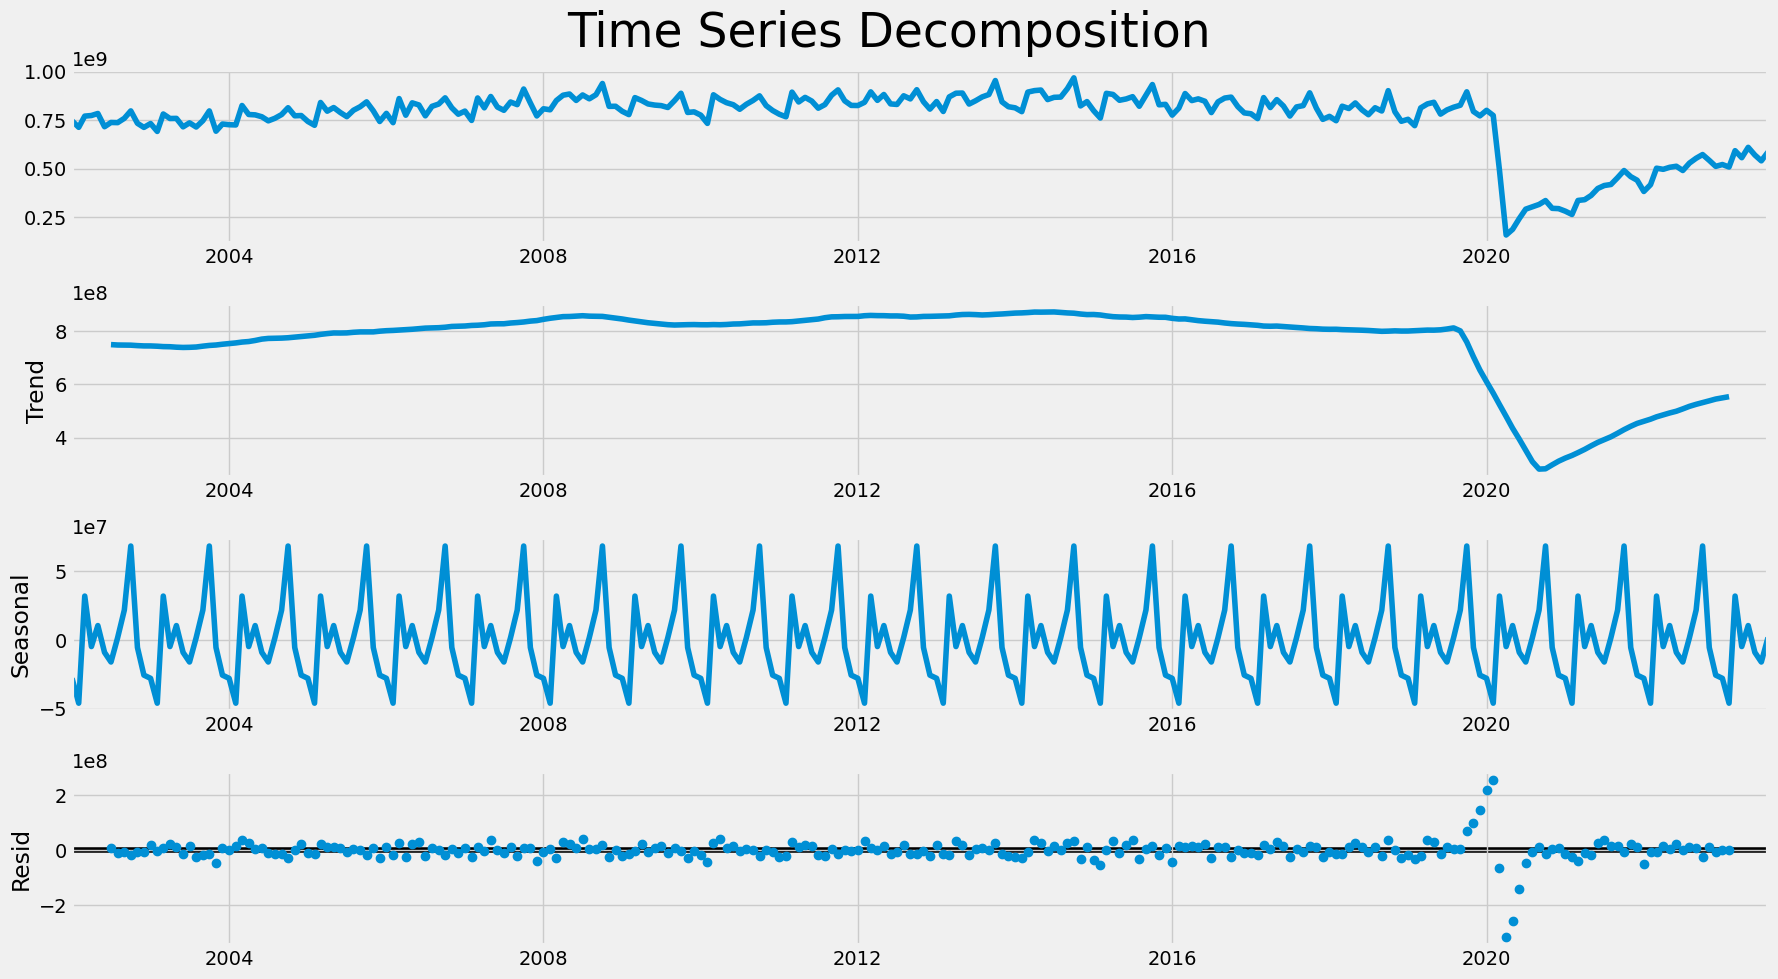

<Figure size 1800x1400 with 0 Axes>

In [45]:
# Plot the separate components
decomposition.plot()

# Add a title to the plot
plt.suptitle('Time Series Decomposition',fontsize=34)
plt.subplots_adjust(top=.92)
plt.figure(figsize=(18,14))

# Display the plot
plt.show()

## 5. Testing for stationarity

Hypothesis for the purposes of the dickey-fuller test: The data is stationary

Null hypothesis: There is a unit root, as in there exists a non-constant jump within the data. <br>
Alternate hypothesis: There is no unit root.

In [160]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_monthly_trips_all_sum['US Transit Trips'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.482718
p-value                          0.542042
Number of Lags Used             15.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


Since the test statistic is not smaller than the 5% critical value, we cannot reject the null hypothesis. 

So, the data is not stationary.

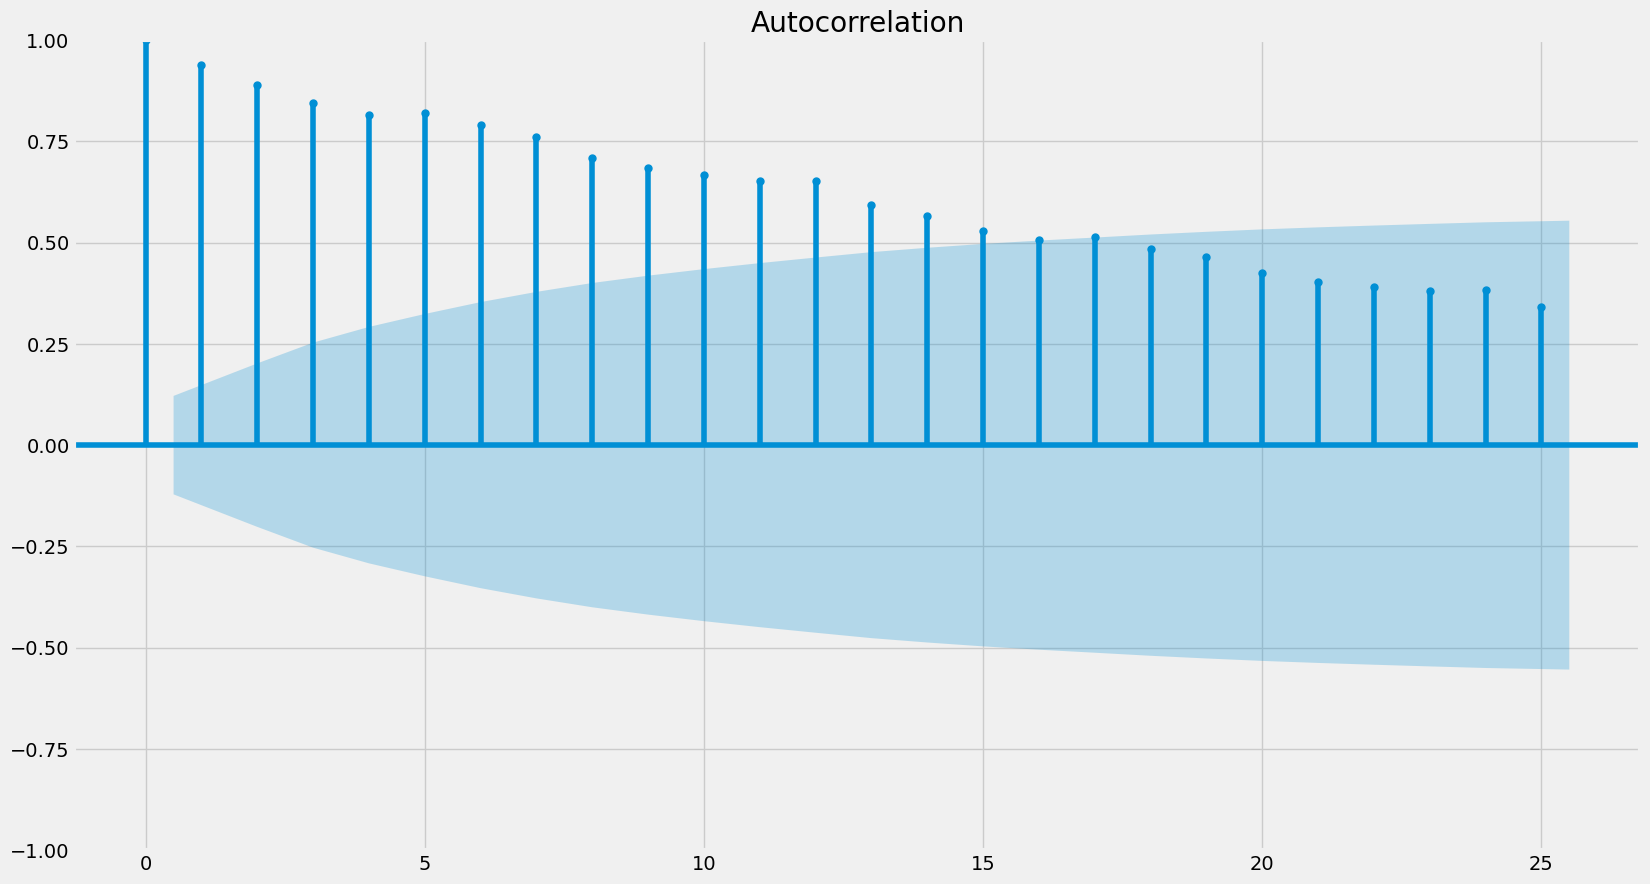

In [161]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_monthly_trips_all_sum)
plt.show()

## 6. Stationarizing transit data

In [162]:
data_diff = df_monthly_trips_all_sum - df_monthly_trips_all_sum.shift(1) 
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [163]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [164]:
data_diff.head()

,US Transit Trips
datetime,
2002-02-01,-33728807.0
2002-03-01,57918159.0
2002-04-01,3076334.0
2002-05-01,10442387.0
2002-06-01,-68302996.0


In [165]:
data_diff.columns

Index(['US Transit Trips'], dtype='object')

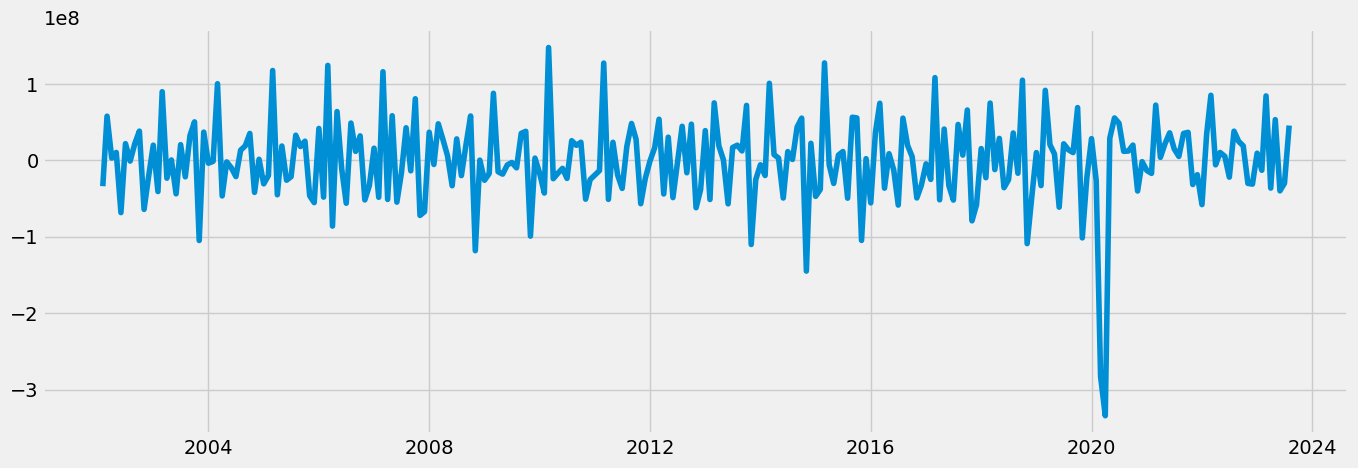

In [166]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [167]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -4.526429
p-value                          0.000176
Number of Lags Used             14.000000
Number of Observations Used    244.000000
Critical Value (1%)             -3.457438
Critical Value (5%)             -2.873459
Critical Value (10%)            -2.573122
dtype: float64


Now, the test statistic is smaler than the critical value at 1%, 5%, and 10%. In addition, the p-value is less than .05 and therefore the test is significant.

So, we can reject the null hypothesis of the existance of a unit root. 

Thus, the data is now stationary. 

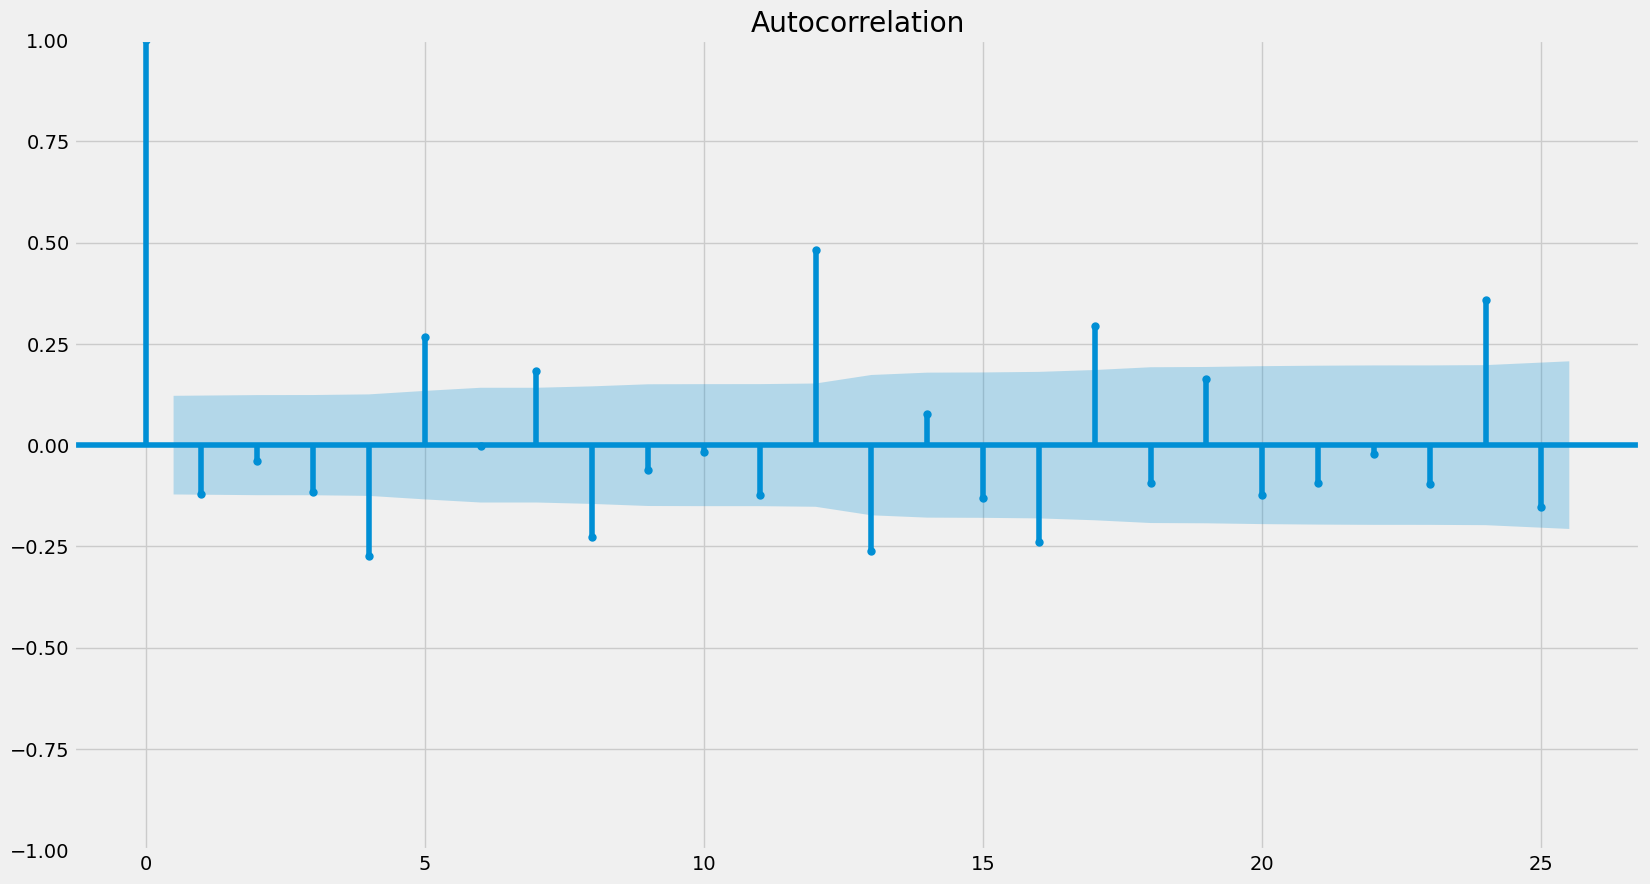

In [168]:
plot_acf(data_diff)
plt.show()

## 7. Time series forecasting 

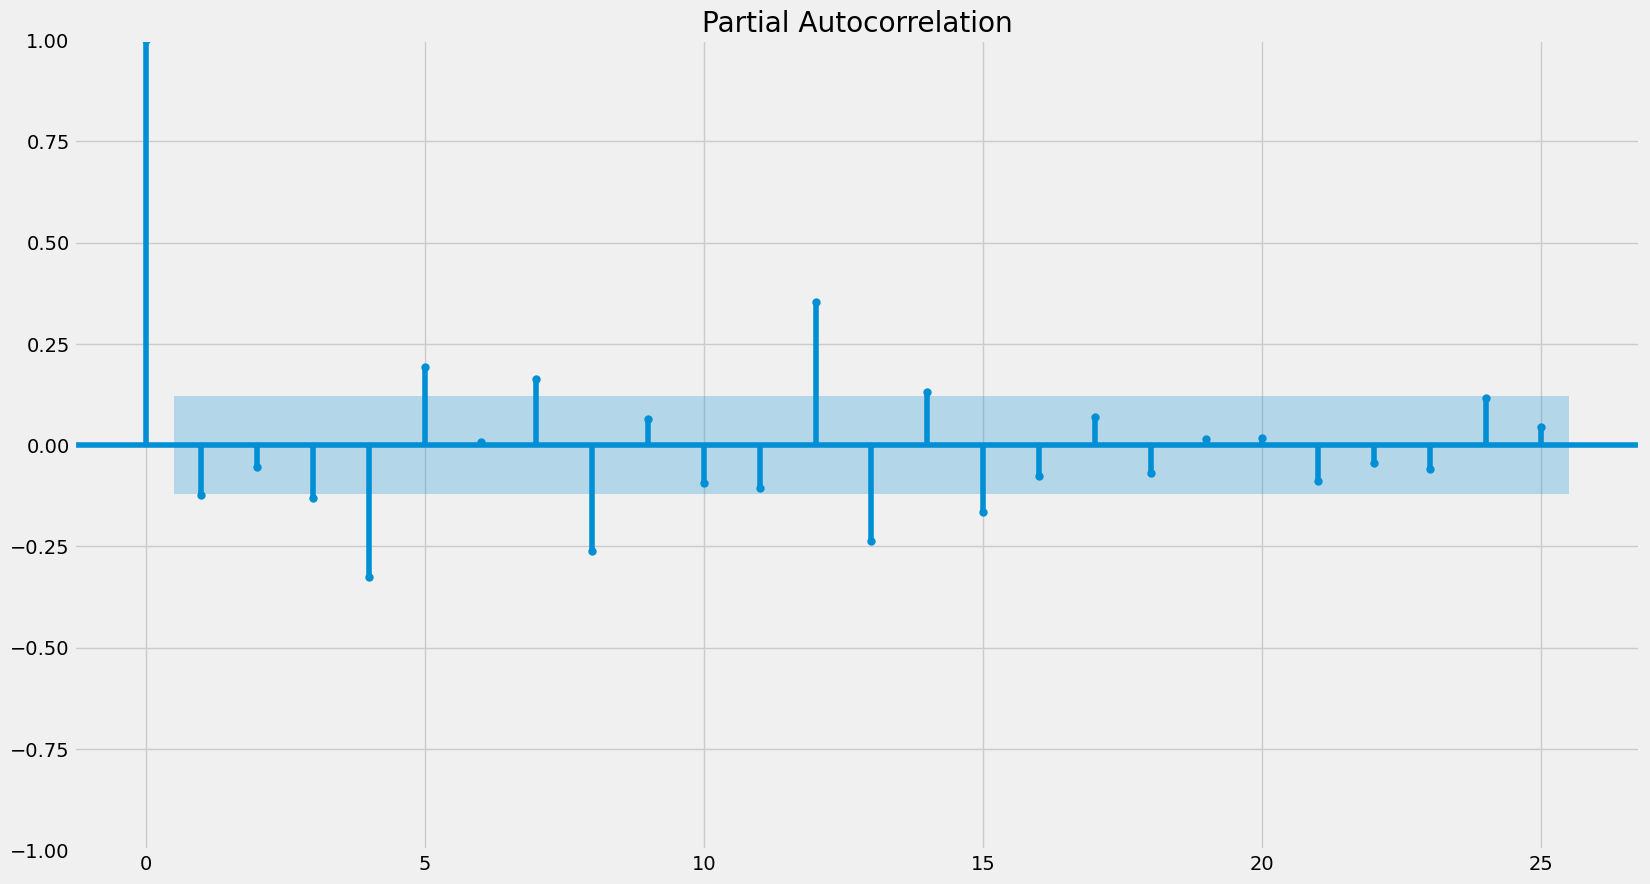

<Figure size 4500x4500 with 0 Axes>

In [169]:
# Plot partial autocorrelations to determine parameter p

plot_pacf(data_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

Lets start with p = 3

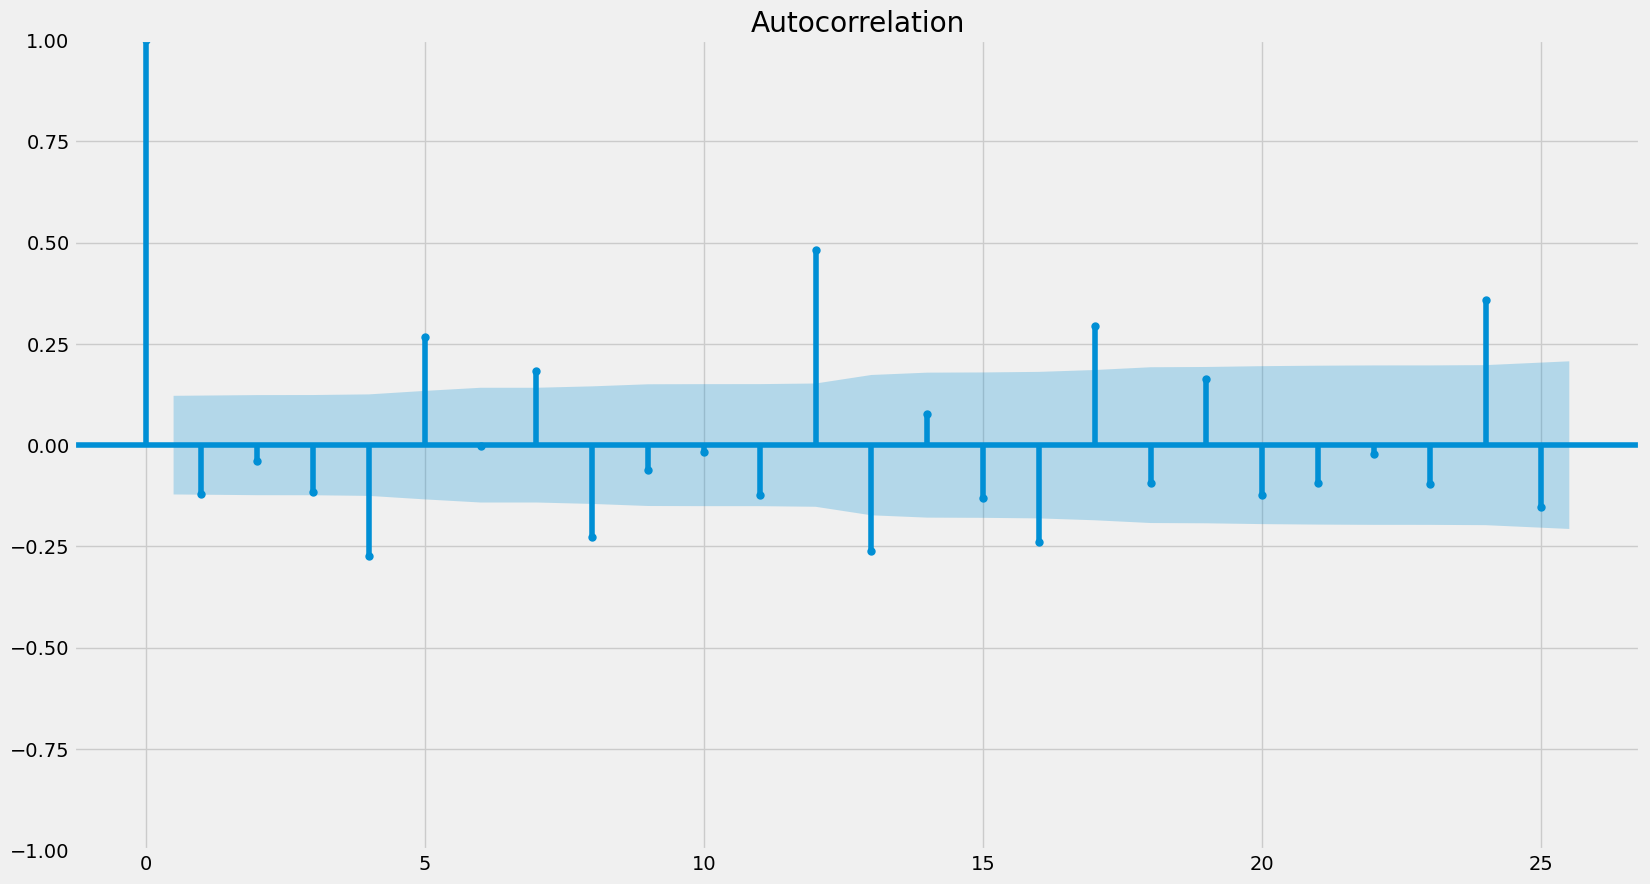

<Figure size 1500x500 with 0 Axes>

In [170]:
# Plot autocorrelations to determine parameter q

plot_acf(data_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

There are many significant autocorrelations spread throughout the series. 

We'll start with q = 3

#### Split data for the purposes of linear regression

In [171]:
data_diff.shape

(259, 1)

In [172]:
# Split the data so that the test data starts in September of 2020,
# about 6 months since the start of the US lockdown for the COVID-19 pandemic which started in March of 2020.

train = data_diff['US Transit Trips'][:224]
test = data_diff['US Transit Trips'][223:]

In [173]:
test

datetime
2020-09-01    12322101.0
2020-10-01    20087968.0
2020-11-01   -40035892.0
2020-12-01    -1637295.0
2021-01-01   -13193010.0
2021-02-01   -16942031.0
2021-03-01    72392034.0
2021-04-01     4027016.0
2021-05-01    21697662.0
2021-06-01    36126734.0
2021-07-01    15198323.0
2021-08-01     5267487.0
2021-09-01    35351512.0
2021-10-01    36799881.0
2021-11-01   -31531141.0
2021-12-01   -18680280.0
2022-01-01   -57846105.0
2022-02-01    34772949.0
2022-03-01    85281223.0
2022-04-01    -5761081.0
2022-05-01    10400586.0
2022-06-01     5421234.0
2022-07-01   -21907138.0
2022-08-01    38298583.0
2022-09-01    24940130.0
2022-10-01    19061109.0
2022-11-01   -30039317.0
2022-12-01   -31005621.0
2023-01-01     9514585.0
2023-02-01   -12899755.0
2023-03-01    84446640.0
2023-04-01   -36213485.0
2023-05-01    53383136.0
2023-06-01   -39794360.0
2023-07-01   -29906168.0
2023-08-01    45707030.0
Name: US Transit Trips, dtype: float64

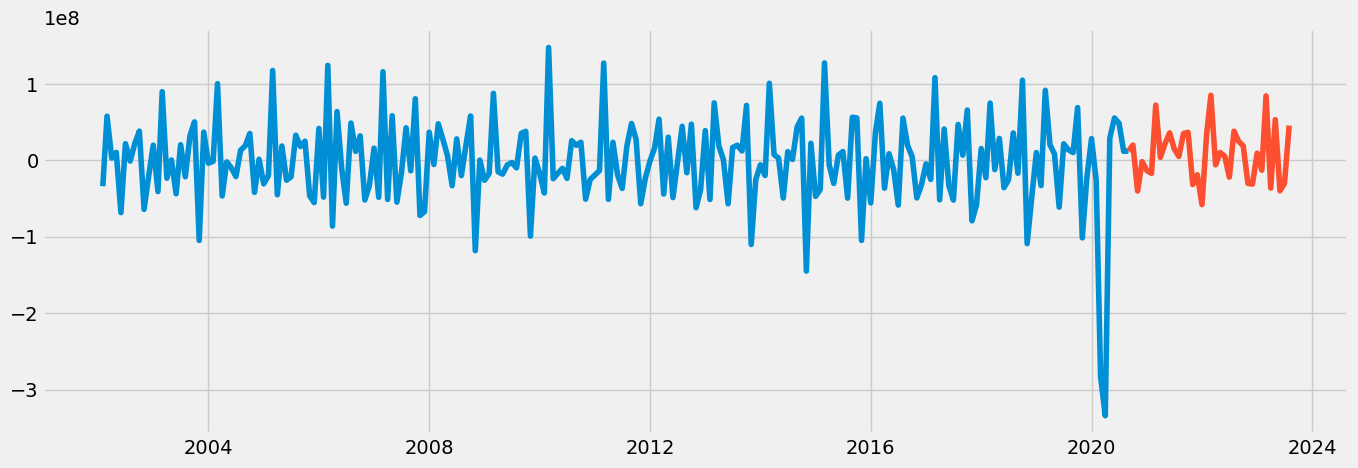

In [174]:
# Plot both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)

In [175]:
test.shape

(36,)

#### Running and fitting the model

In [176]:
from statsmodels.tsa.api import ARIMA # Import the model you need

                               SARIMAX Results                                
Dep. Variable:       US Transit Trips   No. Observations:                  224
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4283.918
Date:                Mon, 27 Nov 2023   AIC                           8581.837
Time:                        09:20:47   BIC                           8605.687
Sample:                    02-01-2002   HQIC                          8591.465
                         - 09-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6184      0.076    -21.374      0.000      -1.767      -1.470
ar.L2         -0.8006      0.133     -6.006      0.000      -1.062      -0.539
ar.L3          0.1145      0.076      1.516      0.1

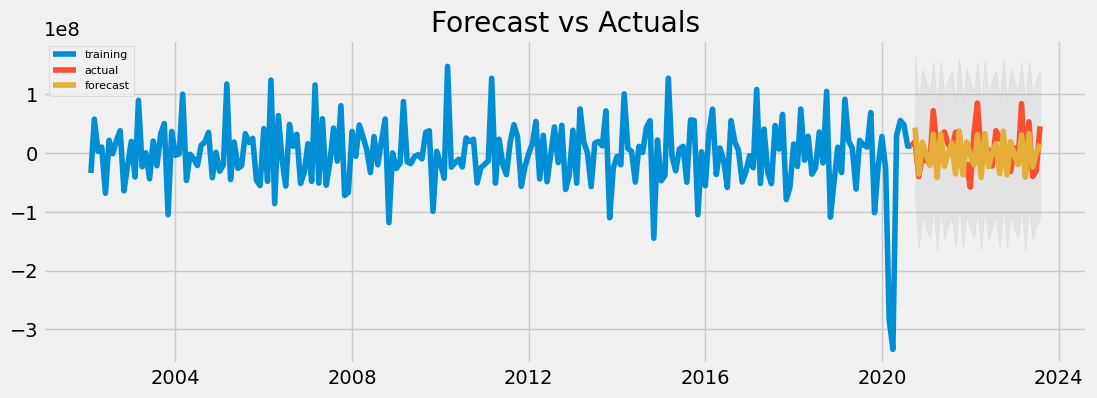

In [177]:
# Use values p = 3, d = 1, q = 3
model = ARIMA(train, order=(3, 1, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_results = fitted.get_forecast(steps=36, alpha=0.05) # 95% confidence interval  --> alpha = 0.05; 39 is the shape of the test set

# Extracting forecast and confidence interval
fc = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)  # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)  # Upper bound of the confidence interval


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In this model, although the plot looks to match the actual values, 3 coefficients are not signifcant. 

#### Iterating

                               SARIMAX Results                                
Dep. Variable:       US Transit Trips   No. Observations:                  224
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4297.939
Date:                Mon, 27 Nov 2023   AIC                           8605.879
Time:                        09:20:49   BIC                           8622.915
Sample:                    02-01-2002   HQIC                          8612.756
                         - 09-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9339      0.173     -5.408      0.000      -1.272      -0.595
ar.L2         -0.2099      0.084     -2.504      0.012      -0.374      -0.046
ma.L1         -0.1634      0.166     -0.981      0.3

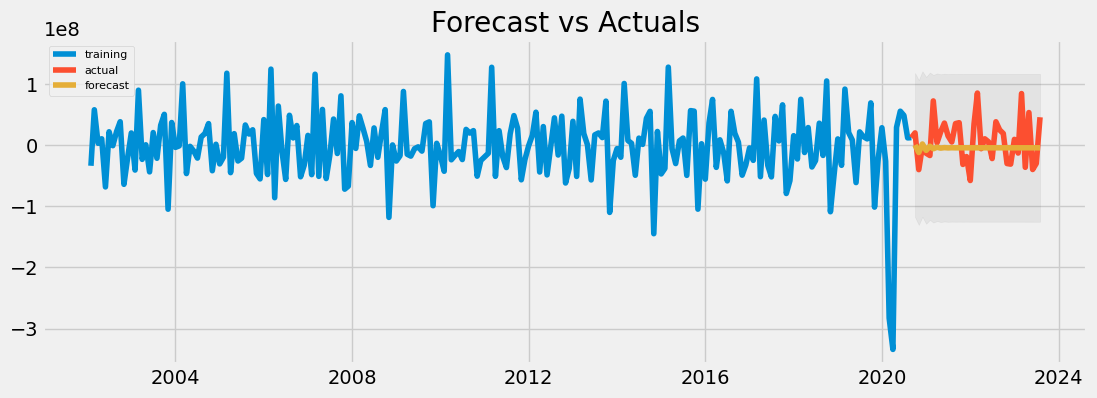

In [178]:
# Use values p = 2, d = 1, q = 2
model = ARIMA(train, order=(2, 1, 2))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_results = fitted.get_forecast(steps=39, alpha=0.05) # 95% confidence interval  --> alpha = 0.05; 39 is the shape of the test set

# Extracting forecast and confidence interval
fc = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)  # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)  # Upper bound of the confidence interval


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This model using p = 2, d = 1, and q = 2 does better in the signifcant coefficients than the former model. However, there is still one coefficient that is not within the confidence interval.

                               SARIMAX Results                                
Dep. Variable:       US Transit Trips   No. Observations:                  224
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -4287.836
Date:                Mon, 27 Nov 2023   AIC                           8587.672
Time:                        09:20:50   BIC                           8608.115
Sample:                    02-01-2002   HQIC                          8595.925
                         - 09-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7078      0.049    -35.201      0.000      -1.803      -1.613
ar.L2         -0.9151      0.048    -18.902      0.000      -1.010      -0.820
ma.L1          0.7755      0.143      5.419      0.0

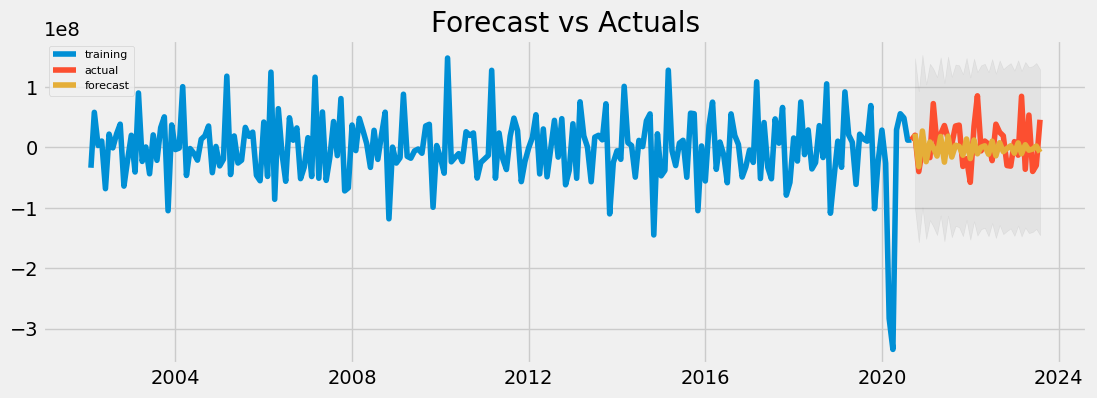

In [179]:
# Use values p = 2, d = 1, q = 3
model = ARIMA(train, order=(2, 1, 3))  
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
forecast_results = fitted.get_forecast(steps=39, alpha=0.05) # 95% confidence interval  --> alpha = 0.05; 39 is the shape of the test set

# Extracting forecast and confidence interval
fc = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

# Make into pandas series
fc_series = pd.Series(fc, index=test.index)  # This creates the forecasted curve
lower_series = pd.Series(conf_int.iloc[:, 0], index=test.index)  # lower bound of the confidence interval
upper_series = pd.Series(conf_int.iloc[:, 1], index=test.index)  # Upper bound of the confidence interval


# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05) # This creates the confidence interval
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#### The above model with p = 2, d = 1, and q = 3 is the best forecasting of the series. 
All coefficients are siginifcant and the plot showcases a reasonable degree of forecasting. 